In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("http://51.91.120.89/extras/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
# konwersja z jedn. imperialnych na metryczne
df.Height *= 2.54
df.Weight /= 2.2

In [4]:
df.head()

,Gender,Height,Weight
0,Male,187.571423,109.951620
1,Male,174.706036,73.777488
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364


In [5]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [6]:
pd.get_dummies(df)

,Height,Weight,Gender_Female,Gender_Male
0,187.571423,109.951620,0,1
1,174.706036,73.777488,0,1
2,188.239668,96.700389,0,1
3,182.196685,100.019305,0,1
4,177.499761,93.795364,0,1
...,...,...,...,...
9995,168.078536,62.171570,1,0
9996,170.350573,77.667230,1,0
9997,162.224700,58.397872,1,0
9998,175.346978,74.478392,1,0


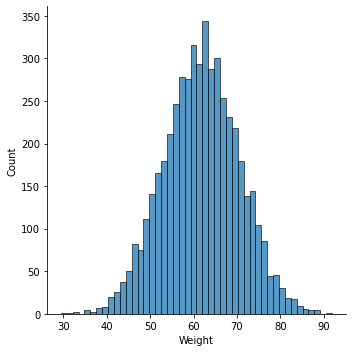

In [8]:
sns.displot(df.query(" Gender=='Female' ").Weight)

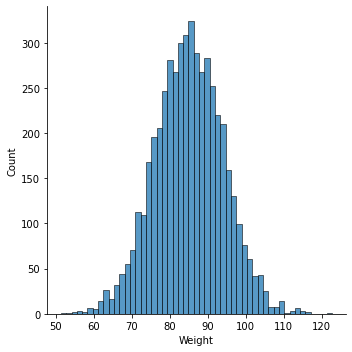

In [9]:
sns.displot(df.query(" Gender=='Male' ").Weight)

In [11]:
df = pd.get_dummies(df)
df

,Height,Weight,Gender_Female,Gender_Male
0,187.571423,109.951620,0,1
1,174.706036,73.777488,0,1
2,188.239668,96.700389,0,1
3,182.196685,100.019305,0,1
4,177.499761,93.795364,0,1
...,...,...,...,...
9995,168.078536,62.171570,1,0
9996,170.350573,77.667230,1,0
9997,162.224700,58.397872,1,0
9998,175.346978,74.478392,1,0


In [12]:
# usunięcie nadmiarowej kolumny
del(df["Gender_Male"])

In [14]:
# Dla Gender:
# 0 - mezczyzni
# 1 - kobiety
df.rename(columns={"Gender_Female":"Gender"}, inplace=True)
df.sample(n=5)

,Height,Weight,Gender
4264,162.070233,76.074066,0
2172,173.141910,89.627077,0
625,166.952071,71.010890,0
8708,159.762508,58.436398,1
6366,171.735785,71.709460,1


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
model = LinearRegression()
model.fit(df[ ["Height","Gender"] ] , df.Weight)

LinearRegression()

In [18]:
# obliczanie predykcji dla nowej próbki danych
model.predict([ [192, 0] ])

array([102.84294991])

In [19]:
# obliczanie predykcji dla nowych próbek danych
model.predict([ [192, 0] , [188, 0], [154, 1] ])

array([102.84294991,  98.56453815,  53.38998795])

In [20]:
model.coef_ , model.intercept_

(array([ 1.06960294, -8.80805024]), -102.52081454490089)

In [22]:
pd.DataFrame(model.coef_, ["Height","Gender"])

,0
Height,1.069603
Gender,-8.808050


In [23]:
height = 192
gender = 0 # mezczyzna
model.intercept_ + model.coef_[0]*height + model.coef_[1]*gender

102.84294990633599